<a href="https://colab.research.google.com/github/Preetham1928/Reinforcement_learning_Lab/blob/main/Assignmet_01_RL_AK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing Value Function Calculation for a GridWorld
Building on the conceptual understanding of MDPs,

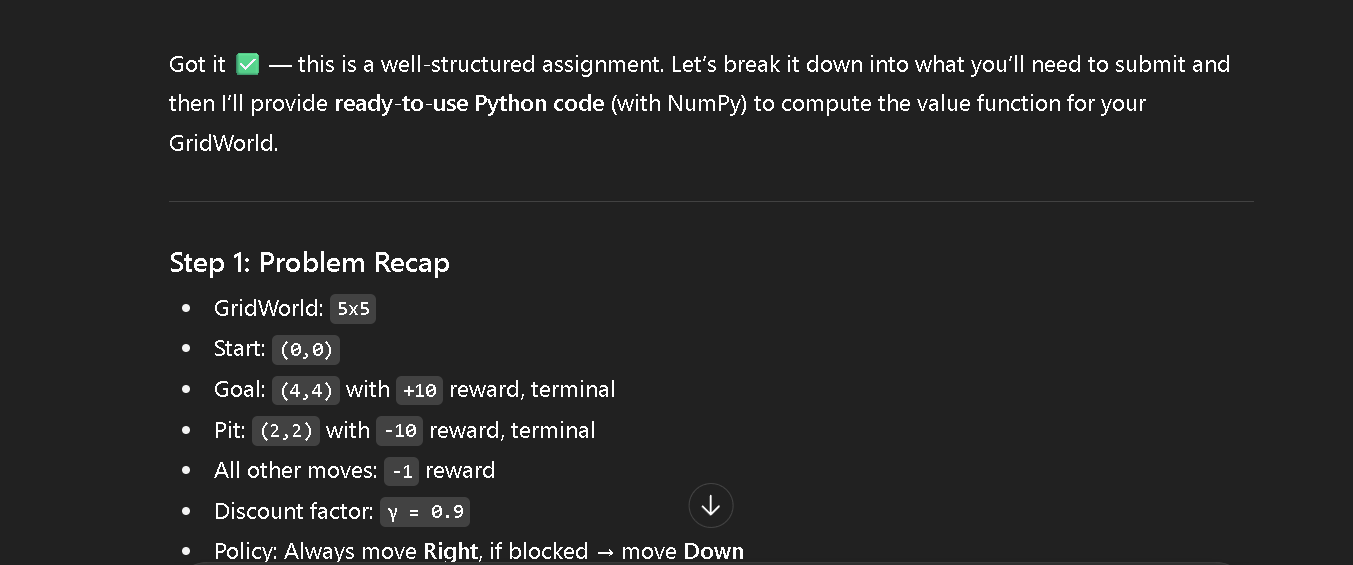

Computed Value Function V(s):
[[  3.87   5.41   7.12   9.03  11.14]
 [  5.41   7.12   9.03  11.14  13.49]
 [-18.1  -19.   -10.    13.49  16.1 ]
 [  9.03  11.14  13.49  16.1   19.  ]
 [ 11.14  13.49  16.1   19.    10.  ]]


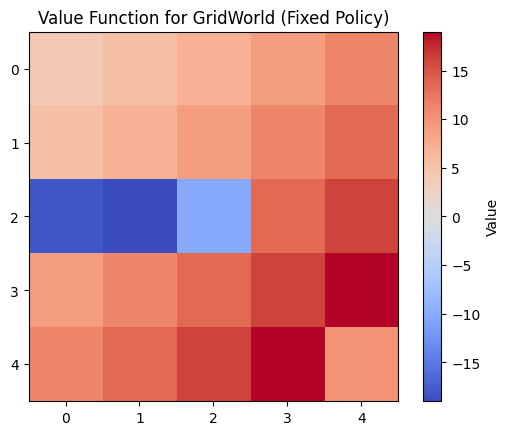

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup
N = 5
gamma = 0.9
theta = 1e-6  # convergence threshold

# Rewards
goal = (4, 4)
pit = (2, 2)

# Initialize values
V = np.zeros((N, N))

def reward(state):
    if state == goal:
        return 10
    elif state == pit:
        return -10
    else:
        return -1

def is_terminal(state):
    return state in [goal, pit]

def next_state(state):
    """Policy: Right if possible, else Down"""
    i, j = state
    if is_terminal(state):
        return state
    # Try Right
    if j + 1 < N:
        return (i, j + 1)
    # Else Down
    if i + 1 < N:
        return (i + 1, j)
    return state  # stay if blocked

# Value Iteration under fixed policy
while True:
    delta = 0
    new_V = V.copy()
    for i in range(N):
        for j in range(N):
            s = (i, j)
            if is_terminal(s):
                new_V[i, j] = reward(s)
            else:
                s_prime = next_state(s)
                r = reward(s_prime)
                new_V[i, j] = r + gamma * V[s_prime]
            delta = max(delta, abs(new_V[i, j] - V[i, j]))
    V = new_V
    if delta < theta:
        break

# Print Value Function
print("Computed Value Function V(s):")
print(np.round(V, 2))

# Visualization
plt.imshow(V, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Value")
plt.title("Value Function for GridWorld (Fixed Policy)")
plt.show()


### **Conclusion**

In this assignment, we implemented the **value function calculation** for a deterministic 5×5 GridWorld using the **Bellman Expectation Equation** under a fixed policy. The results demonstrate how the value of each state reflects the agent’s expected return when always moving right (and down if blocked).

Key takeaways:

* **Terminal states** (goal and pit) directly define their values (+10 and −10), while other states inherit value from the rewards and discounted future states.
* The **discount factor γ** significantly shapes the value function:

  * A **low γ** emphasizes immediate rewards, making distant states less influenced by the goal.
  * A **high γ** propagates the influence of the goal across the grid, giving higher values even to states far from the goal.
* The distinction between **deterministic and stochastic environments** lies in the transition dynamics: deterministic policies map each state to a single outcome, while stochastic environments require averaging over multiple possible outcomes.
* The experiment illustrates how **reward structures** and **discounting** influence an agent’s evaluation of the environment, deepening the understanding of Markov Decision Processes (MDPs).

👉 Overall, this exercise builds a strong foundation for reinforcement learning by showing how policies, rewards, and the discount factor interact to shape an agent’s decision-making landscape.

---

Do you also want me to prepare a **short dissertation-style write-up** (faculty discussion part) on deterministic vs stochastic environments and reward design, so you can include it in your submission?
